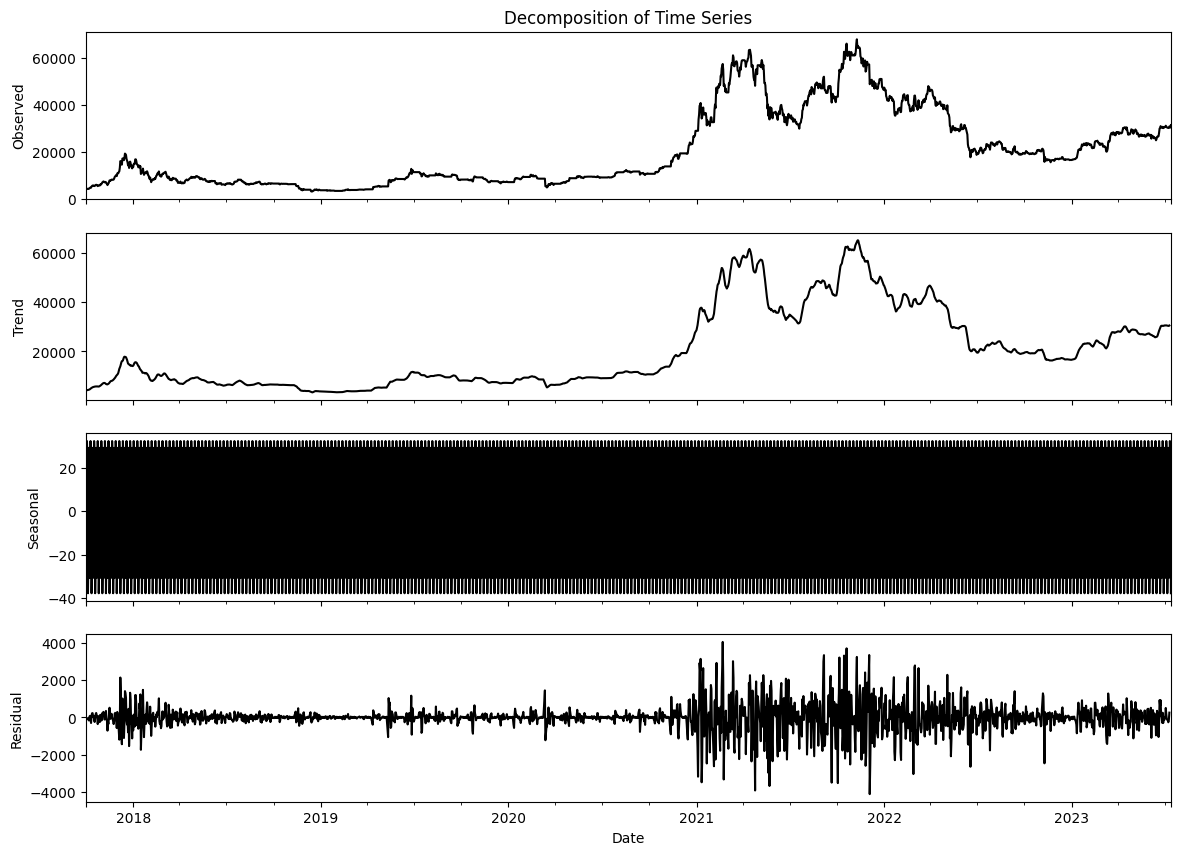

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

data = pd.read_csv("/content/daily_btc_1.csv")
# Convert 'Date' to datetime format with specified formats
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y', errors='coerce')

# Set 'Date' as the index
data.set_index('Date', inplace=True)

# Remove commas from 'Close' column and convert to float
data['Close'] = data['Close'].str.replace(',', '').astype(float)

# Aggregate duplicate dates by mean of 'Close' prices
data = data.groupby('Date')['Close'].mean()

# Convert Series back to DataFrame
data = data.to_frame()

# Set frequency to daily
data = data.asfreq('D')

# Forward fill to handle any newly introduced missing values after frequency setting
data['Close'].fillna(method='ffill', inplace=True)

# Decompose the time series
result = seasonal_decompose(data['Close'], model='additive')

# Set the style of the plot to 'default' for white background
plt.style.use('default')

# Plot the original data, the trend, the seasonality, and the residuals
fig, axes = plt.subplots(4, 1, sharex=True, figsize=(14,10))

result.observed.plot(ax=axes[0], legend=False, color='black')
axes[0].set_ylabel('Observed')
axes[0].set_title('Decomposition of Time Series')

result.trend.plot(ax=axes[1], legend=False, color='black')
axes[1].set_ylabel('Trend')

result.seasonal.plot(ax=axes[2], legend=False, color='black')
axes[2].set_ylabel('Seasonal')

result.resid.plot(ax=axes[3], legend=False, color='black')
axes[3].set_ylabel('Residual')

plt.show()


In [5]:
data.head()

,Date,Open,High,Low,Close
0,12/31/2022,"16,576","16,634","16,541","16,549"
1,12/31/2021,"47,239","48,564","45,715","46,322"
2,12/31/2020,"28,898","29,298","27,989","28,966"
3,12/31/2019,"7,254","7,309","7,132","7,171"
4,12/31/2018,"3,859","3,888","3,697","3,721"
